# Experimental Design for Single Qubit Hamiltonian Learning

These scenarios consider a two-level quantum system whose binary measurement probabilities undergo oscillations at an unknown frequency \cite{Ferrie_2012, Wiebe_2016, Granade_2012, Wiebe_2014a}, induced by the time-independent Hamiltonian:
$$ H = \frac{\omega}{2}\sigma_i, $$

with $i \in \{x, y, z\}$. In the Bloch sphere, this causes a precession of the Bloch vector around the axis corresponding to $\sigma_i$.  The resulting probabilities for another observable $\sigma_j$, $j \neq i$ are given by: 
$$\mathbf{P}(x\mid \omega;t)=\left(\sin^2(\omega t) \right)^x\left(\cos^2(\omega t) \right)^{1-x}$$

, with $x \in \{0,1\}$ a binary outcome, $\omega$ the parameter of interest (a frequency to be estimated), and $t$ the evolution time before measurement. The latter being a controllable parameter, it can be used as an experimental control; measuring the system at different times amounts to sampling from different instances of a parametrized probability distribution. Our goal is to choose a sequence of measurement times, optimizing the data collection of $(t,x)$ tuples to enable quantum-enhanced estimation of $\omega$. 

We applu Bayesian inference to this problem. For the choices of measurement times, we consider 5 different strategies: 

- The $1/\sigma$ heuristic (SH), which chooses $t_{i+1} \propto 1/\sigma_i$, with $\sigma_i$ the standard deviation of the latest Bayesian distribution;
- The particle guess heuristic (PGH), which is similar to SH but replaces $\sigma_i$ by $\lvert w_a-w_b \rvert$, where $w_a, w_b$ are two random samples of the lastest Bayesian distribution;
- A random times strategy, with times sampled from $\sim [0, tmax]$
- The window expansion strategy (WES), which minimizes the expected variance by applying Bayesian experimental design with some problem specific tricks;
- The annealed window expansion strategy (aWES), which is similar to WES but optimizes a metric of statistic robustness rather than the variance. 



## Plotting from pre-existing datasets



In [ ]:
from scripts.plotting_from_files import plot_estimation_from_files

### Noiseless case

These results are plotted directly from the folder `datasets/noiseless`.

> Will plot frequency estimation results from folder 'noiseless'.


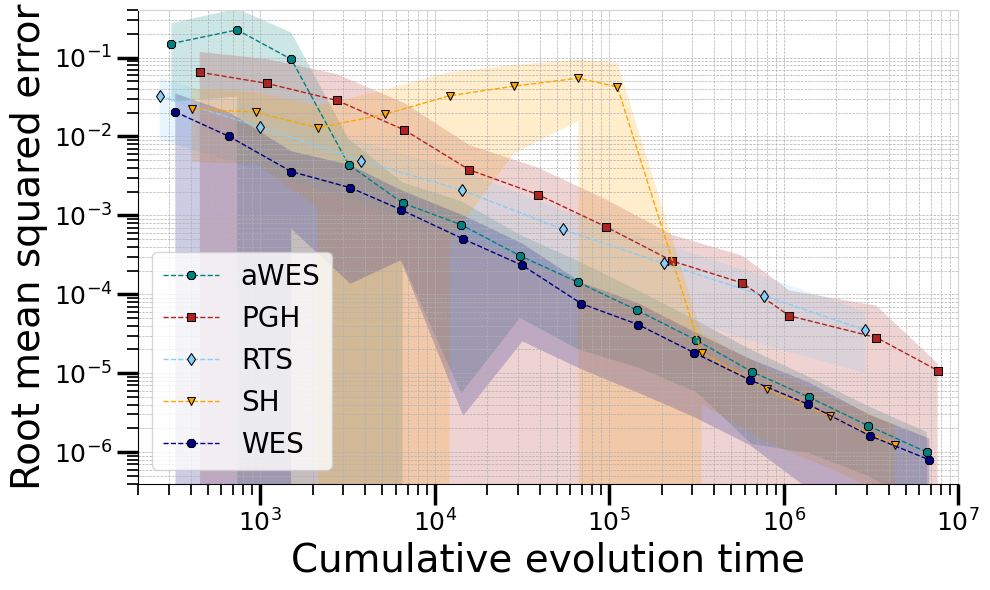

In [5]:
plot_estimation_from_files(noise = False, separate = False)

We can also plot each algorithm separately for more detail and a comparison with the fundamental limits of metrology. This also prints the parameters estimated by a fit to the data, i.e. $m$ and $b$ in $\mathrm{error} = \exp(b)*Nq^{m}$, which correspond respectively to the slope and offset in a loglog plot.

> Will plot frequency estimation results from folder 'noiseless'.
> Awes root mean squared error = O(Nq^-1.0); offset = 2.66.


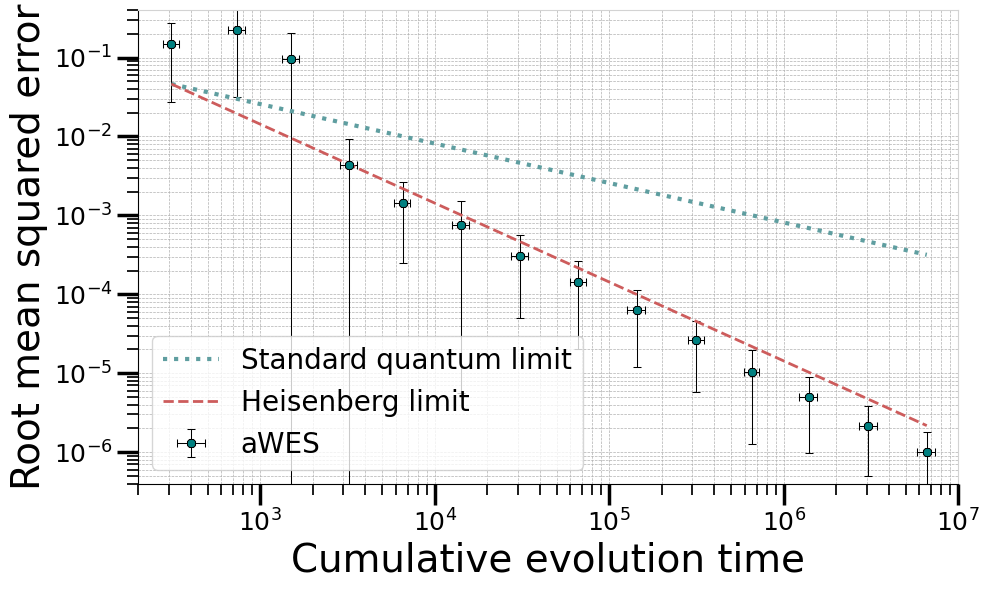

> Pgh root mean squared error = O(Nq^-0.66); offset = 0.53.


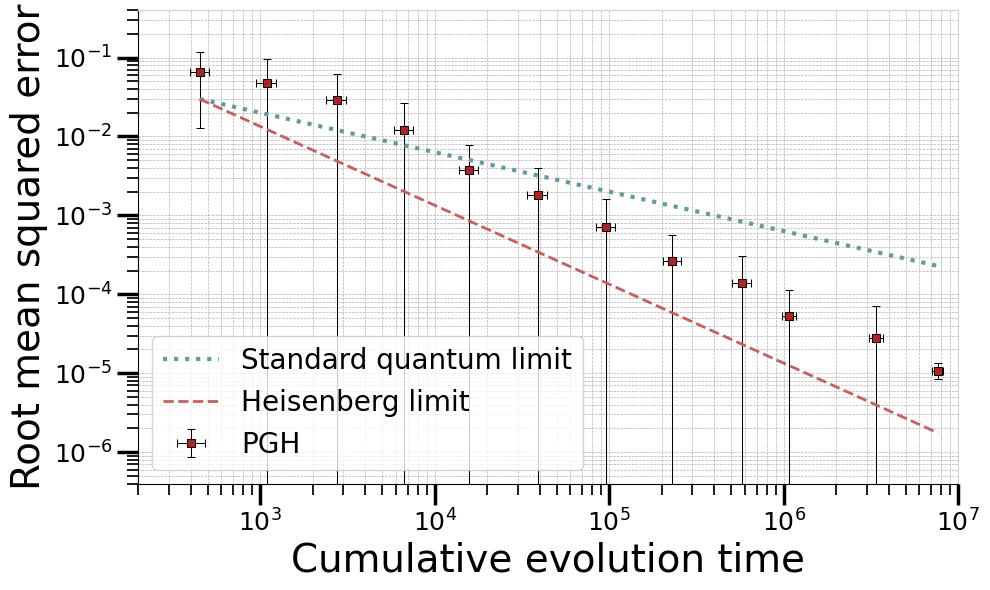

> Rts root mean squared error = O(Nq^-0.44); offset = -2.22.


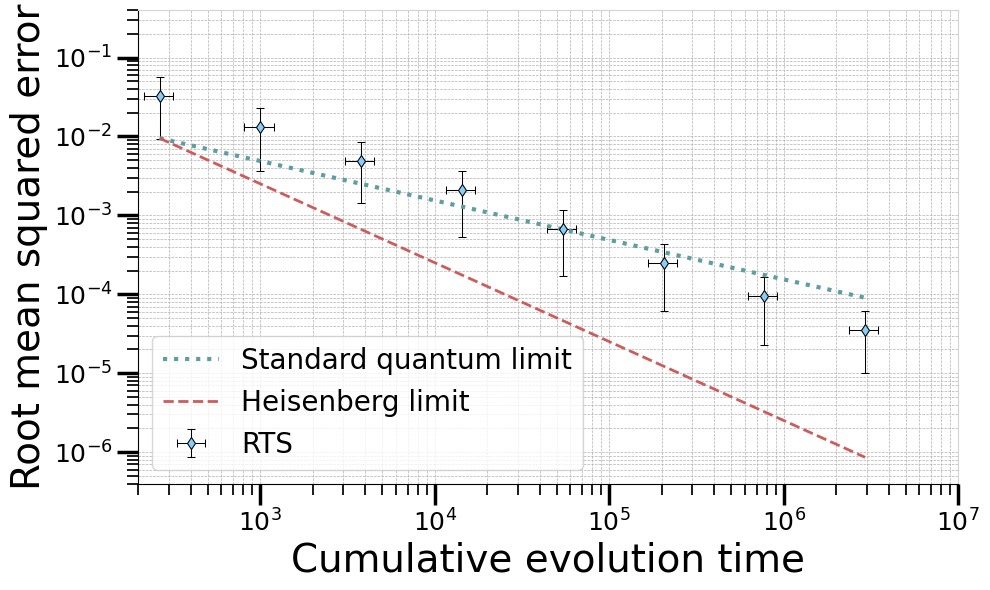

> Sh root mean squared error = O(Nq^-0.86); offset = 1.64.


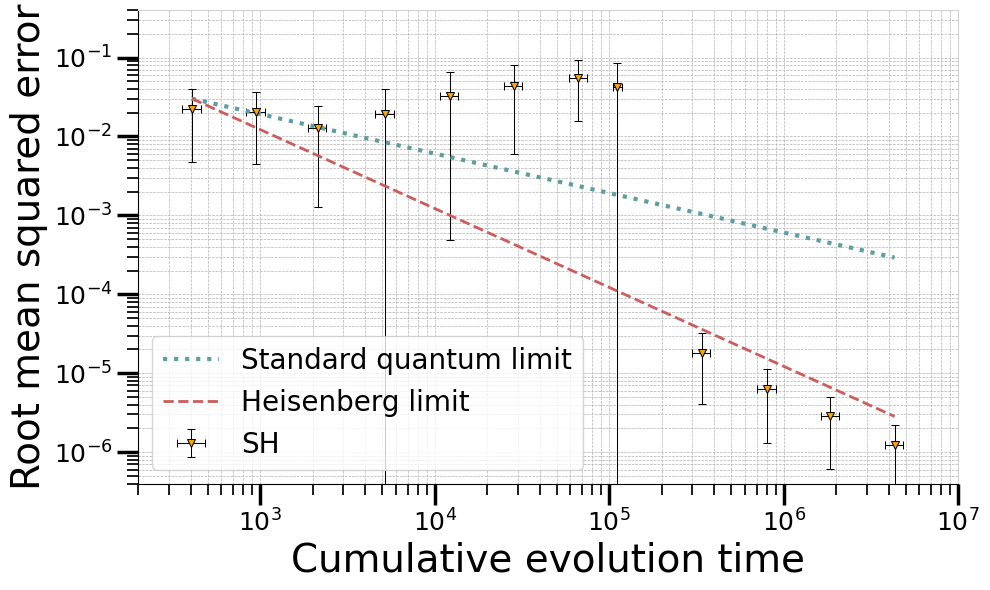

> Wes root mean squared error = O(Nq^-1.0); offset = 1.77.


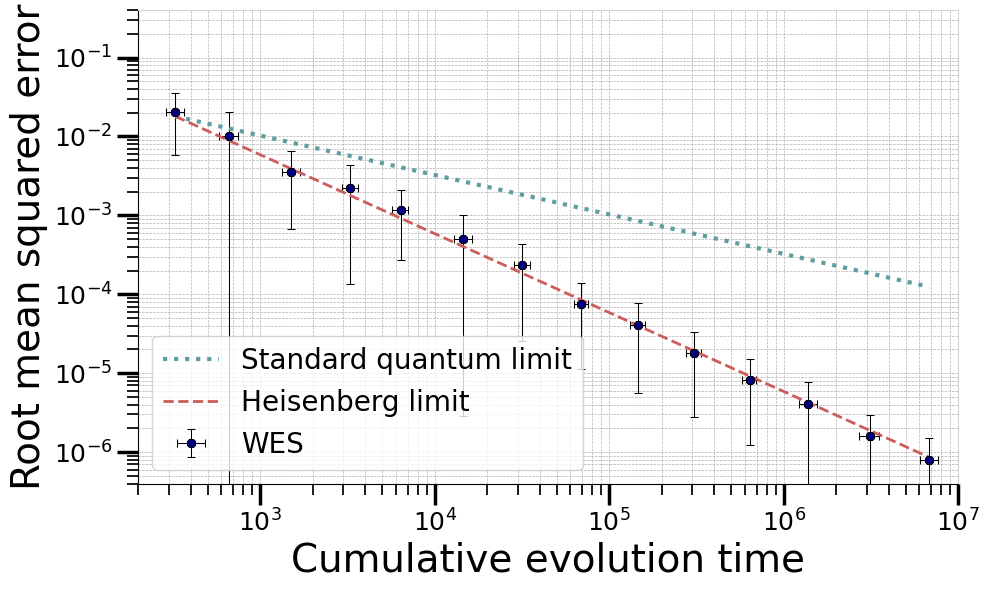

In [6]:
plot_estimation_from_files(noise = False, separate = True)

For further customization (axis limits, cut-off points, type of error display, statistics to take), use the function `plot_estimation_from_files` in `scripts/plotting_from_files`. Here we fix the value ranges and axis limits for a clearer comparison between strategies, but this can be changed by doing `xrg = None; axlims = None`.

### Noisy case

In this case, decoherence is present, in the form of exponential damping of the likelihood function. 

> Will plot frequency estimation results from folder 'noisy'.


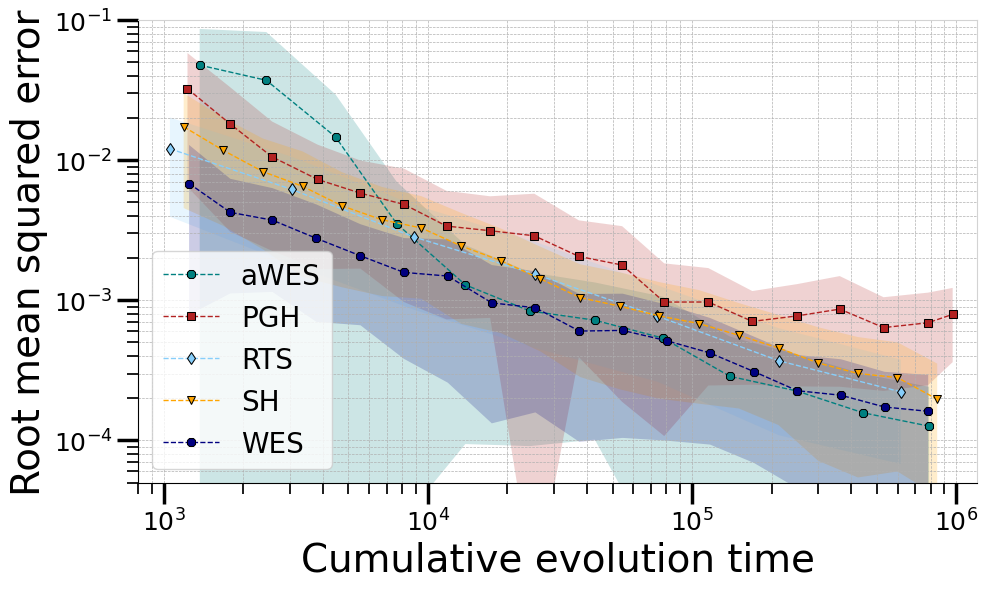

In [7]:
plot_estimation_from_files(noise = True, separate = False)

> Will plot frequency estimation results from folder 'noisy'.
> Awes root mean squared error = O(Nq^-1.0); offset = 3.95.


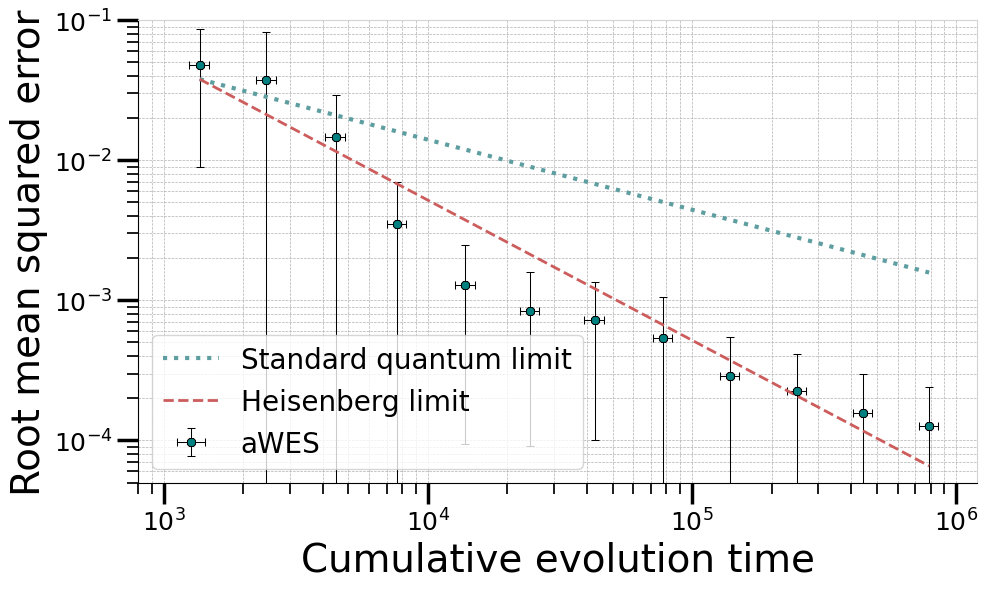

> Pgh root mean squared error = O(Nq^-0.52); offset = -0.5.


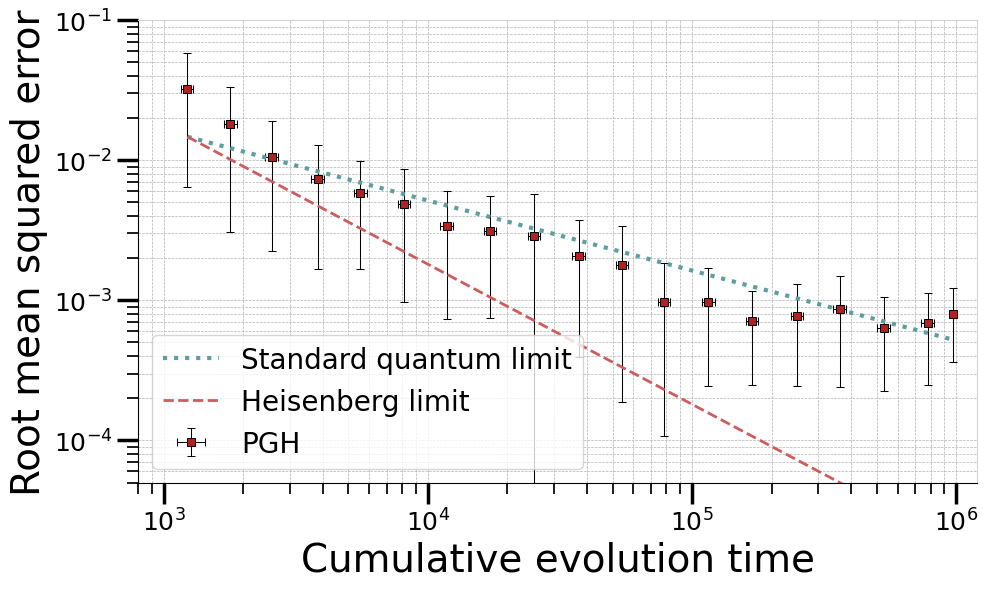

> Rts root mean squared error = O(Nq^-0.4); offset = -1.87.


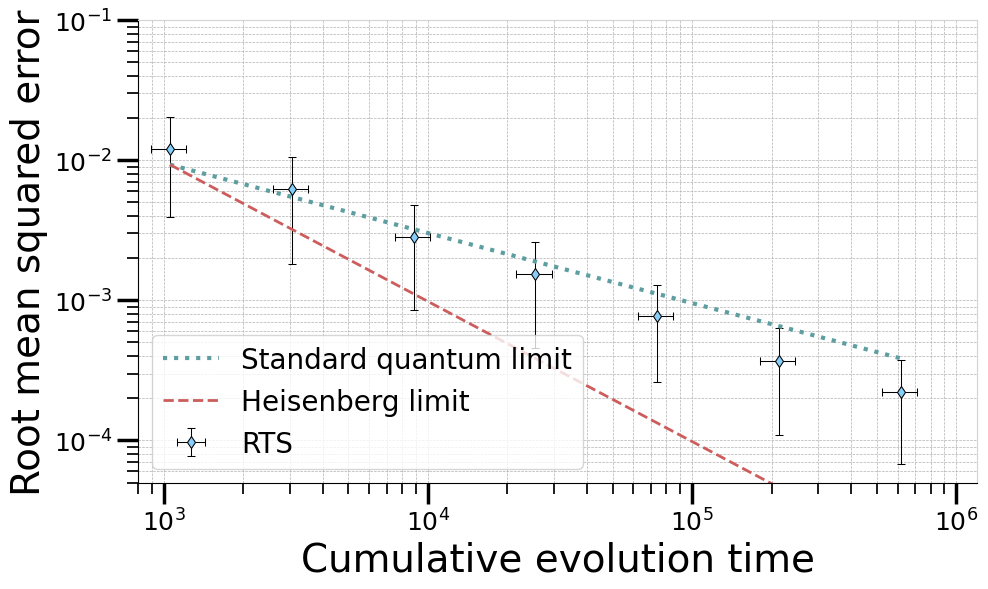

> Sh root mean squared error = O(Nq^-0.65); offset = 0.22.


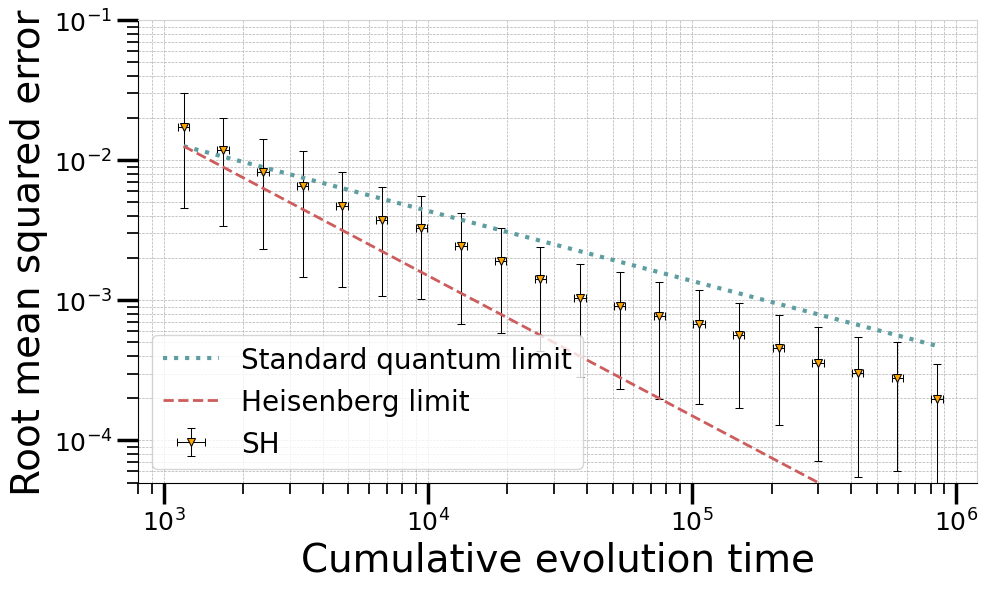

> Wes root mean squared error = O(Nq^-0.55); offset = -1.34.


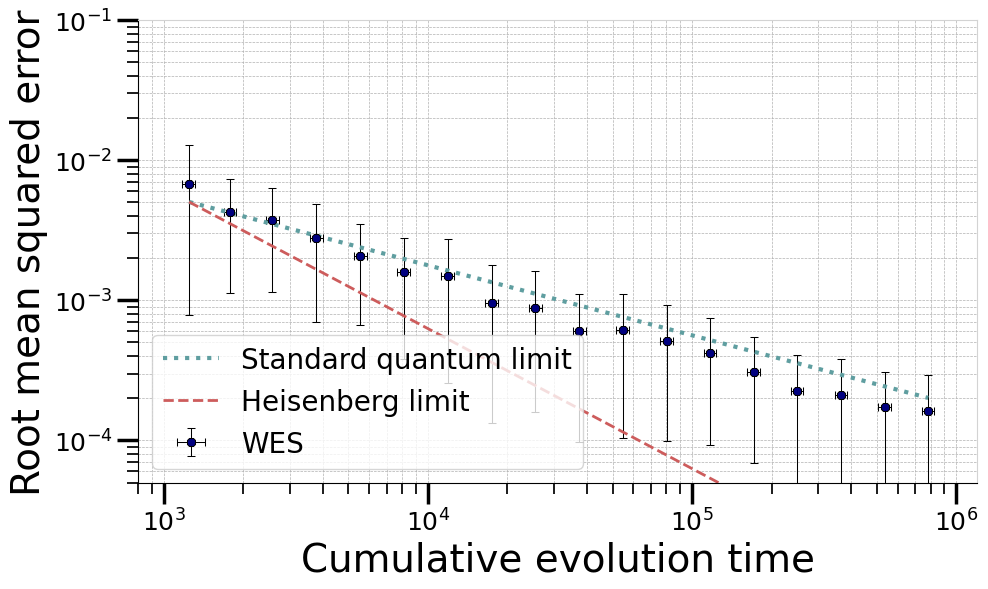

In [8]:
plot_estimation_from_files(noise = True, separate = True)

# Running the code

In [ ]:
import numpy as np
from src.algorithms.WES_testing import TestWES

# Define the arguments that are common to all the algorithms. 
Tcrange = None 
wmax = np.pi/2
w = (0,wmax)  
Tc = None 
maxPT = 1e7
nruns = 100
sampler_str = "RWM"
save = False
show = True

# Strategy for dealing with decoherence.
Tc_opts = {"Tc": Tc,
            "Tc_precalc": True if Tc else False,
            "known_Tc": True,
            "range": Tcrange}

# Sampler arguments for the representation of the Bayesian distributions.
sampler_kwargs = {"Npart": 2000,
                  "c": 2.38,
                  "thr": 0.5,
                  "var": "w",
                  "ut": "varN2",
                  "log": True,
                  "res_ut": False,
                  "plot": False}

In [ ]:
# Strategy for the adaptive optimization.
strat = {"wNs": 10,
            "Ns": 1,
            "TNs": 500,
            "k": 2,
            "Nevals": 50,
            "erefs": 5,
            "ethr": 3,
            "cap": False,
            "capk": 2}

Test = TestWES(w, wmax, Tc_opts, strat, maxPT, sampler_str,
                    sampler_kwargs, save = save, show = show)

Test.sqe_evolution_multiple(nruns)

## References

[1] Ferrie et al (2012). How to best sample a periodic probability distribution, or on the accuracy of Hamiltonian finding strategies.

[2] Wiebe et al (2014). Hamiltonian Learning and Certification Using Quantum Resources.